In [1]:
import sys
import numpy as np
import pandas as pd
import csv
import keras
import tensorflow as tf
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [48]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D, MaxPool2D, Flatten,LeakyReLU
from keras.optimizers import SGD,Adam
from keras.utils import np_utils
from keras.utils import to_categorical
from keras.layers.convolutional import Conv2D,MaxPooling2D  

In [158]:
from keras.layers import Dense, Convolution2D, UpSampling2D, MaxPooling2D, ZeroPadding2D, Flatten, Dropout, Reshape,AveragePooling2D
from keras.models import Sequential,load_model
from keras.utils import np_utils

In [5]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [6]:
data=train.values

In [118]:
train_data=[]
train_labels=[]
val_data=[]
val_labels=[]
labels=to_categorical(data[:,0])
for i in range(train.shape[0]):
    image=train.iloc[i,1].split()
    image=list(map(float,image))
    image=np.array(image).reshape(-1,48,1)
    if (i % 10 == 0):
        val_data.append(image)
        val_labels.append(labels[i])
    else:
        train_data.append(image)
        train_data.append(np.flip(image,axis=0))
        train_labels.append(labels[i])
        train_labels.append(labels[i])
train_data = np.array(train_data, dtype=float) / 255.0
val_data = np.array(val_data, dtype=float) / 255.0
train_labels = np.array(train_labels, dtype=int)
val_labels = np.array(val_labels, dtype=int)

In [126]:
print(train_data.shape)
print(train_labels.shape)
print(val_data.shape)
print(val_labels.shape)

(51676, 48, 48, 1)
(51676, 7)
(2871, 48, 48, 1)
(2871, 7)


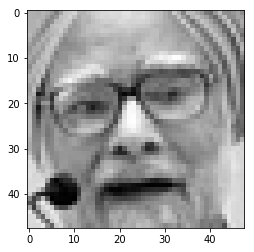

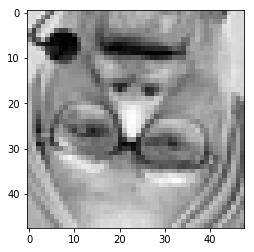

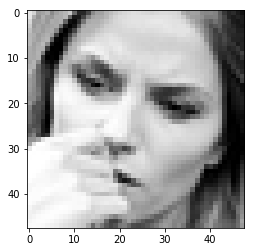

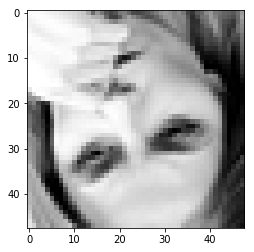

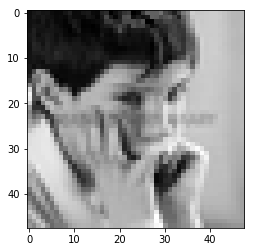

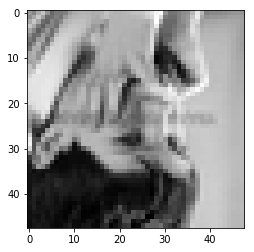

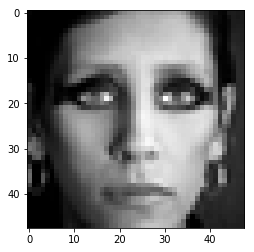

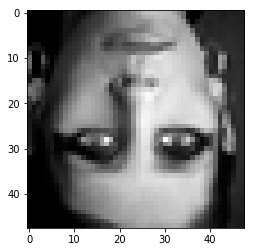

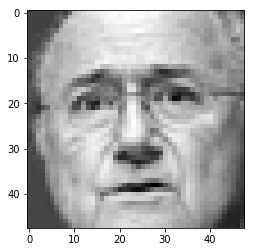

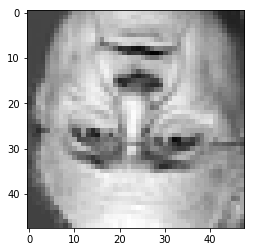

In [127]:
plt.figure()
for i in range(10):
    im = train_data[i].reshape(48,48)*255
#     im = np.flip(im,axis=0)
    plt.imshow(im,'gray')
    plt.pause(0.0000001)
plt.show()

In [103]:
train_data.shape

(28709, 48, 48, 1)

In [104]:
train_data[0:3].shape

(3, 48, 48, 1)

In [106]:
train_data_new=train_data[0:20000]
val_data=train_data[20000:28709]
train_labels_new=train_labels[0:20000]
val_labels=train_labels[20000:28709]

In [83]:
print(train_data_new.shape)
print(train_labels_new.shape)
print(val_data.shape)
print(val_labels.shape)

(20000, 48, 48, 1)
(20000, 7)
(8709, 48, 48, 1)
(8709, 7)


In [52]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_110 (Conv2D)          (None, 24, 24, 64)        1088      
_________________________________________________________________
batch_normalization_122 (Bat (None, 24, 24, 64)        256       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 24, 24, 64)        36928     
_________________________________________________________________
batch_normalization_123 (Bat (None, 24, 24, 64)        256       
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 12, 12, 64)        0         
__________

In [155]:
model = Sequential()
model.add(Conv2D(64,(4,4),strides=(2,2),input_shape=(48,48,1),padding='same',kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.2))
model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.2))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.2))
model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.2))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.2))
model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.2))
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',kernel_initializer='uniform'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',kernel_initializer='uniform'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',kernel_initializer='uniform'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',kernel_initializer='uniform'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',kernel_initializer='uniform'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# # model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',kernel_initializer='uniform'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',kernel_initializer='uniform'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',kernel_initializer='uniform'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',kernel_initializer='uniform'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',kernel_initializer='uniform'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(1024))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.5))
model.add(Dense(7,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy',optimizer=SGD(lr=0.1),metrics=['accuracy'])
model.fit(train_data,train_labels,batch_size=256,epochs=30)
result = model.evaluate(train_data,train_labels)
print ('\nTest Acc:', result[1])
result_val = model.evaluate(val_data,val_labels)
print ('\nTest Acc:', result_val[1])

Epoch 1/30
51676/51676 [==============================] - 23s 441us/step - loss: 2.3435 - acc: 0.2286
Epoch 2/30
51676/51676 [==============================] - 16s 315us/step - loss: 1.7911 - acc: 0.2569
Epoch 3/30
51676/51676 [==============================] - 16s 316us/step - loss: 1.6622 - acc: 0.3346
Epoch 4/30
51676/51676 [==============================] - 16s 315us/step - loss: 1.5035 - acc: 0.4140
Epoch 5/30
51676/51676 [==============================] - 16s 317us/step - loss: 1.3721 - acc: 0.4685
Epoch 6/30
51676/51676 [==============================] - 16s 316us/step - loss: 1.2767 - acc: 0.5100
Epoch 7/30
51676/51676 [==============================] - 16s 317us/step - loss: 1.1991 - acc: 0.5407
Epoch 8/30
51676/51676 [==============================] - 16s 316us/step - loss: 1.1323 - acc: 0.5686
Epoch 9/30
51676/51676 [==============================] - 16s 318us/step - loss: 1.0633 - acc: 0.5929
Epoch 10/30
51676/51676 [==============================] - 16s 318us/step - loss: 

In [188]:
result = model2.evaluate(val_data,val_labels)
print ('\nTest Acc:', result[1])

8709/8709 [==============================] - 2s 218us/step

Test Acc: 0.2743139281203353


In [132]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_93 (Conv2D)           (None, 48, 48, 64)        1664      
_________________________________________________________________
activation_28 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
zero_padding2d_11 (ZeroPaddi (None, 52, 52, 64)        0         
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
zero_padding2d_12 (ZeroPaddi (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 26, 26, 64)        36928     
_________________________________________________________________
activation_29 (Activation)   (None, 26, 26, 64)        0         
__________

In [153]:
model2 = Sequential()
model2.add(Conv2D(32,(3,3),input_shape=(48,48,1),padding='same',kernel_initializer='uniform'))
model2.add(Activation('relu'))
# # model.add(BatchNormalization())
model2.add(Conv2D(32,(3,3),padding='same',kernel_initializer='uniform')) 
model2.add(Activation('relu'))
# model.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
model2.add(Conv2D(64,(3,3),padding='same',kernel_initializer='uniform'))
model2.add(Activation('relu'))
# model.add(BatchNormalization())
model2.add(Conv2D(64,(3,3),padding='same',kernel_initializer='uniform')) 
model2.add(Activation('relu'))
# model.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(256,(3,3),padding='same',kernel_initializer='uniform')) 
model2.add(Activation('relu'))
model2.add(Conv2D(256,(3,3),padding='same',kernel_initializer='uniform')) 
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Flatten())  
model2.add(Dense(1024,activation='relu'))
# model.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(512,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(7,activation='softmax'))  
# model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model2.fit(train_data,train_labels,batch_size=128,epochs=30)
result = model.evaluate(train_data,train_labels)
print ('\nTest Acc:', result[1])
result_val = model.evaluate(val_data,val_labels)
print ('\nTest Acc:', result_val[1])

Epoch 1/30
51676/51676 [==============================] - 29s 571us/step - loss: 1.8193 - acc: 0.2477
Epoch 2/30
51676/51676 [==============================] - 23s 439us/step - loss: 1.8139 - acc: 0.2503
Epoch 3/30
51676/51676 [==============================] - 23s 436us/step - loss: 1.8129 - acc: 0.2503
Epoch 4/30
51676/51676 [==============================] - 23s 442us/step - loss: 1.8128 - acc: 0.2503
Epoch 5/30
51676/51676 [==============================] - 23s 438us/step - loss: 1.8121 - acc: 0.2503
Epoch 6/30
51676/51676 [==============================] - 23s 436us/step - loss: 1.8122 - acc: 0.2503
Epoch 7/30
51676/51676 [==============================] - 22s 435us/step - loss: 1.8119 - acc: 0.2503
Epoch 8/30
51676/51676 [==============================] - 23s 436us/step - loss: 1.8119 - acc: 0.2503
Epoch 9/30
51676/51676 [==============================] - 23s 437us/step - loss: 1.8117 - acc: 0.2503
Epoch 10/30
51676/51676 [==============================] - 23s 436us/step - loss: 

KeyboardInterrupt: 

# VGGnet

In [129]:
model = Sequential()
model.add(Conv2D(64,(3,3),strides=(1,1),input_shape=(48,48,1),padding='same',kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_data,train_labels,batch_size=256,epochs=40)
result = model.evaluate(train_data,train_labels)
print ('\nTest Acc:', result[1])
result_val = model.evaluate(val_data,val_labels)
print ('\nTest Acc:', result_val[1])

Epoch 1/40
51676/51676 [==============================] - 80s 2ms/step - loss: 1.8733 - acc: 0.2473
Epoch 2/40
51676/51676 [==============================] - 73s 1ms/step - loss: 1.7590 - acc: 0.2781
Epoch 3/40
51676/51676 [==============================] - 74s 1ms/step - loss: 1.5497 - acc: 0.3771
Epoch 4/40
51676/51676 [==============================] - 73s 1ms/step - loss: 1.3896 - acc: 0.4351
Epoch 5/40
51676/51676 [==============================] - 74s 1ms/step - loss: 1.2945 - acc: 0.4756
Epoch 6/40
51676/51676 [==============================] - 73s 1ms/step - loss: 1.1998 - acc: 0.5317
Epoch 7/40
51676/51676 [==============================] - 73s 1ms/step - loss: 1.1182 - acc: 0.5735
Epoch 8/40
51676/51676 [==============================] - 73s 1ms/step - loss: 1.0460 - acc: 0.6017
Epoch 9/40
51676/51676 [==============================] - 73s 1ms/step - loss: 0.9805 - acc: 0.6323
Epoch 10/40
51676/51676 [==============================] - 73s 1ms/step - loss: 0.9167 - acc: 0.6606

In [130]:
test_data=np.zeros((test.shape[0],48,48,1),dtype=float)
for i in range(test.shape[0]):
    image=test.iloc[i,1].split()
    image=list(map(float,image))
    image=np.array(image).reshape(-1,48,1)
    test_data[i]=image/255.0

In [131]:
test_data.shape

(7178, 48, 48, 1)

In [144]:
test_label=model.predict(test_data)

In [15]:
test_label=model2.predict(test_data)

In [133]:
test_label.shape

(7178, 7)

In [148]:
test_label[100]

array([4.6296849e-05, 2.8134108e-08, 6.4947964e-03, 1.6448721e-03,
       2.4955496e-01, 2.7732635e-06, 7.4225628e-01], dtype=float32)

In [149]:
a=np.argmax(test_label, axis=1)

In [139]:
a.shape

(7178,)

In [151]:
f = open('y_test.csv',"w",newline='')
w = csv.writer(f)
title = ['id','label']
w.writerow(title) 
for i in range(0,7178):
    content = [str(i),a[i]]
    w.writerow(content) 
f.close()

In [156]:
model.save('model.h5')

In [159]:
model2 = load_model('model.h5')

In [164]:
model2.cuda()

AttributeError: 'Sequential' object has no attribute 'cuda'

In [156]:
for line in locals()['In']:
    print(line)


import sys
import numpy as np
import pandas as pd
import csv
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPool2D, Flatten
from keras.optimizers import SGD,Adam
from keras.utils import np_utils
from keras.utils import to_categorical
from keras.layers.convolutional import Conv2D,MaxPooling2D  
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
data=train.values
train_data=np.zeros((train.shape[0],48,48,1),dtype=int)
for i in range(train.shape[0]):
    image=train.iloc[i,1].split()
    image=list(map(float,image))
    image=np.array(image).reshape(-1,48,1)
    train_data[i]=image
train_labels=to_categorical(data[:,0])
train_data.shape
train_labels.shape
model = Sequential()
model.add(Conv2D(48,(5,5),input_shape=(48,48,1),activation='relu',kernel_initializer='uniform'))  
model.add(MaxPooling2D(pool_size=(3,3)))  
model.add(Conv2